In [1]:
# load basic packages
# include("/Users/federicoclaudi/Documents/Github/LocomotionControl/analysis/behavior/analysis_fixtures.jl")
# include("/Users/federicoclaudi/Documents/Github/LocomotionControl/analysis/behavior/analysis_visuals.jl")
include("C:\\Users\\Federico\\Documents\\GitHub\\pysical_locomotion\\analysis\\behavior\\analysis_fixtures.jl")
include("C:\\Users\\Federico\\Documents\\GitHub\\pysical_locomotion\\analysis\\behavior\\analysis_visuals.jl")


import jcontrol.bicycle: Bicycle
import jcontrol.control: Bounds, ControlOptions
import InfiniteOpt: termination_status
import jcontrol.Run: run_mtm
import jcontrol: toDict

@Info (Main):  Loaded 995 trials 
  ╰──────────────────────────────────────────────── 
                      Mon, 04 Jul 2022 15:01:08 
@Info (Main):  After tortuosity analysis, discarded 8.643% of trials | 909  
  │                trials left 
  ╰──────────────────────────────────────────────── 
                      Mon, 04 Jul 2022 15:01:10 


  Activating project at `C:\Users\Federico\Documents\GitHub\pysical_locomotion\analysis\behavior`


F8: global MTM while varying parameters and cost function.

In [2]:
globalsolution = load_global_solution();

# Cost function

## RUN simulations

In [56]:
# savepath = "/Users/federicoclaudi/Dropbox (UCL)/Rotation_vte/Locomotion/analysis/behavior/mtm_cost_function"

# """
# Runs the MTM problem while systematically changing the alpha factor of the cost function
#     to assess the effect on behavior
# """


# for γ in range(0.001, stop=0.04, length=20)
#     _, _, control_model, solution = run_mtm(
#         :dynamics,  # model type
#         2.0;  # supports density
#         showtrials=nothing,
#         showplots=false,
#         quiet=true,
#         γ = γ,
#         α=0.0,
#     )

#     if "LOCALLY_SOLVED" == string(termination_status(control_model))
#         destination = joinpath(savepath, "cost_fn_alpha_0_gamma_$(γ).csv")
#         data = DataFrame(toDict(solution))
#         CSV.write(destination, data)
#     else
#         println(termination_status(control_model))
#     end
# end


# # for α in range(1e-6, stop=5e-5, length=20)
# #     _, _, control_model, solution = run_mtm(
# #         :dynamics,  # model type
# #         2.0;  # supports density
# #         showtrials=nothing,
# #         showplots=false,
# #         quiet=true,
# #         α = α,
# #         γ = 0.0,
# #     )

# #     if "LOCALLY_SOLVED" == string(termination_status(control_model))
# #         destination = joinpath(savepath, "cost_fn_alpha_$(α)_gamma_0.csv")
# #         data = DataFrame(toDict(solution))
# #         CSV.write(destination, data)
# #     else
# #         println(termination_status(control_model))
# #     end
# # end

ITERATION_LIMIT


ITERATION_LIMIT


## Analysis

In [9]:
# savepath = "/Users/federicoclaudi/Dropbox (UCL)/Rotation_vte/Locomotion/analysis/behavior/mtm_cost_function"
savepath = "D:\\Dropbox (UCL)\\Rotation_vte\\Locomotion\\analysis\\behavior\\mtm_cost_function"

# load simulations
solutions, _names = load_mtm_solutions(folder=savepath, name="cost_fn_alpha_");

for (solution, name) in zip(solutions, _names)
    println(name, "  ", solution.t[end])
end

cost_fn_alpha_0_gamma_0.001.csv  4.800136368061077
cost_fn_alpha_0_gamma_0.04.csv  7.81002333426055
cost_fn_alpha_0_gamma_0.01331578947368421.csv  5.550121668953226
cost_fn_alpha_0_gamma_0.02768421052631579.csv  7.250083693675629
cost_fn_alpha_0_gamma_0.02973684210526316.csv  7.170070483897398
cost_fn_alpha_0_gamma_0.03178947368421053.csv  7.590025271876975
cost_fn_alpha_0_gamma_0.03794736842105263.csv  7.500065598870154
cost_fn_alpha_0_gamma_0.005105263157894737.csv  4.8900353592405
cost_fn_alpha_0_gamma_0.007157894736842105.csv  5.010092834380344
cost_fn_alpha_0_gamma_0.009210526315789473.csv  5.160012599079619
cost_fn_alpha_0_gamma_0.011263157894736841.csv  5.200161189166412
cost_fn_alpha_0_gamma_0.015368421052631578.csv  5.740127710968796
cost_fn_alpha_0_gamma_0.019473684210526317.csv  6.290126490977219
cost_fn_alpha_0_gamma_0.021526315789473685.csv  6.580003112767078
cost_fn_alpha_0_gamma_0.025631578947368422.csv  7.070094151438661
cost_fn_alpha_0_gamma_0.0030526315789473684.csv  

In [10]:
import OrderedCollections: OrderedDict

γ_solutions = OrderedDict()
α_solutions = OrderedDict()
for (name, sol) in zip(_names, solutions)
    α = parse(Float64, split(name, "_")[4])
    γ = parse(Float64, split(name, "_")[6][1:end-4])

    if α == 0.0
        γ_solutions[γ] = sol
    else
        α_solutions[α] = sol
    end
end
sort!(α_solutions)
sort!(γ_solutions)

γ_solutions

OrderedDict{Any, Any} with 18 entries:
  0.001      => Solution(0.01, [-6.42298e-41, 0.0103265, 0.0201837, 0.0300408, …
  0.00305263 => Solution(0.01, [-3.19029e-40, 0.010316, 0.0201632, 0.0300103, 0…
  0.00510526 => Solution(0.01, [1.048e-39, 0.0100595, 0.020119, 0.0301785, 0.04…
  0.00715789 => Solution(0.01, [-1.35435e-41, 0.0100602, 0.0201204, 0.0301806, …
  0.00921053 => Solution(0.01, [-1.55099e-44, 0.0100588, 0.0201177, 0.0301765, …
  0.0112632  => Solution(0.01, [-9.94992e-39, 0.0100588, 0.0201177, 0.0301765, …
  0.0133158  => Solution(0.01, [-1.42414e-39, 0.0100588, 0.0201177, 0.0301765, …
  0.0153684  => Solution(0.01, [1.57657e-42, 0.0100588, 0.0201177, 0.0301765, 0…
  0.0194737  => Solution(0.01, [9.433e-42, 0.010059, 0.0201181, 0.0301771, 0.04…
  0.0215263  => Solution(0.01, [-5.47724e-39, 0.0100594, 0.0201187, 0.0301781, …
  0.0256316  => Solution(0.01, [-4.08417e-40, 0.0100599, 0.0201197, 0.0301796, …
  0.0276842  => Solution(0.01, [-1.33594e-42, 0.0100624, 0.0201249, 0.

### plot trajectories

In [11]:
function make_palette_blue(x)
    return range(HSL(220, .24, .30), stop=HSL(204, .7, .8), length=length(x))
end


function make_palette_red(x)
    return range(HSL(355, .24, .30), stop=HSL(350, .7, .8), length=length(x))
end


make_palette(class, x) = class == :γ ? make_palette_blue(x) : make_palette_red(x)

make_palette_red(zeros(100))

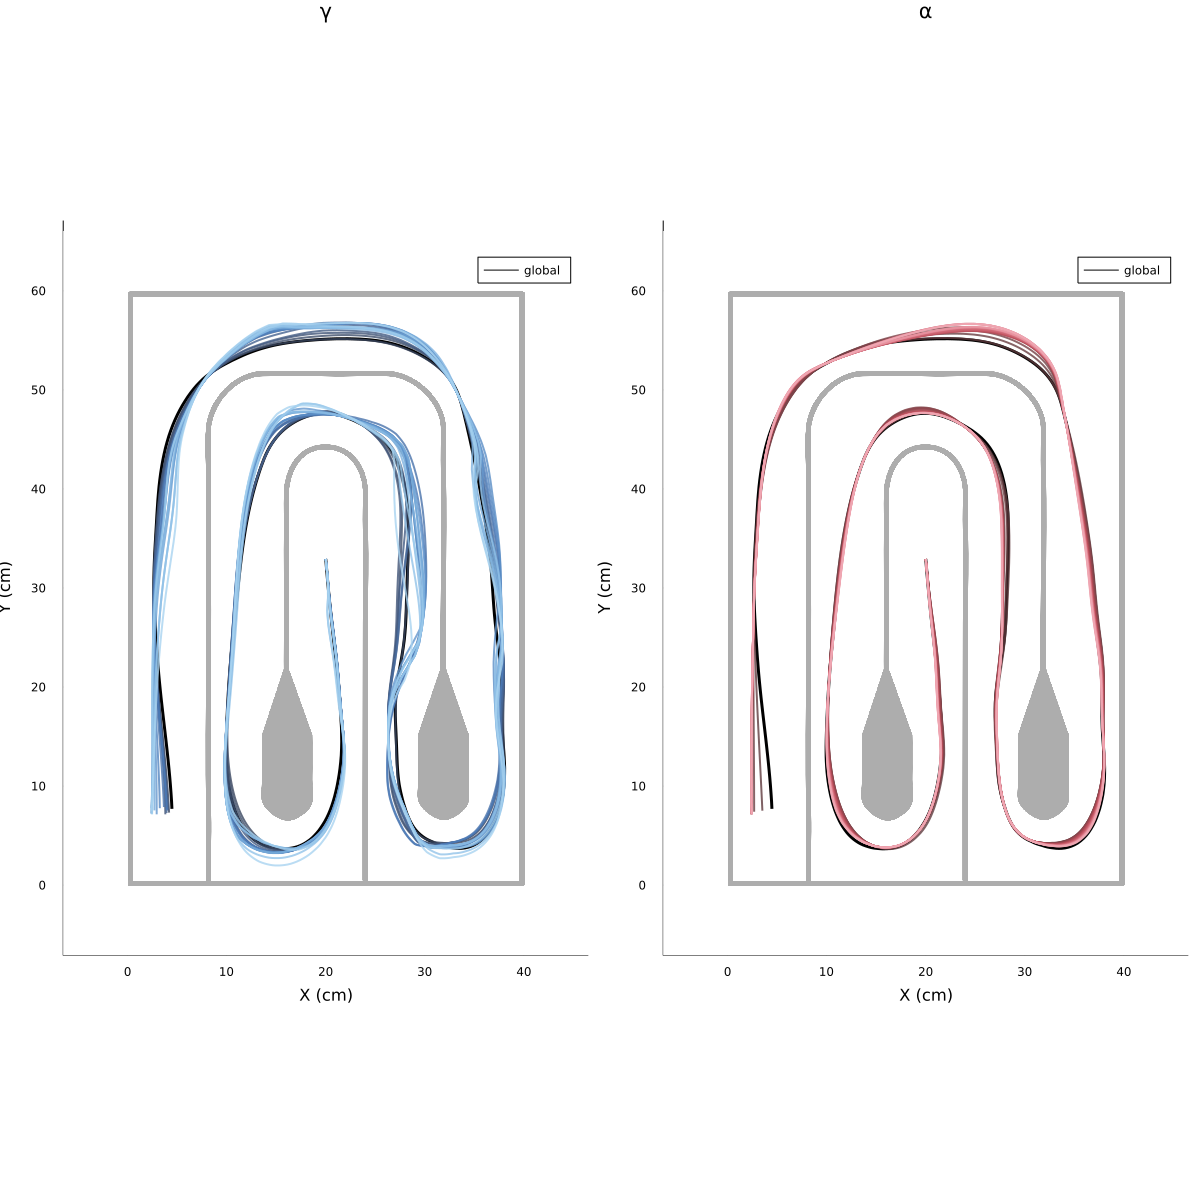

In [12]:

plots = []


for (var, sols) in zip((:γ, :α), (γ_solutions, α_solutions))
    plt = draw(:arena)
    # draw!.(trials[1:100]; alpha=.1)
    plot!(globalsolution.x, globalsolution.y, color="black", lw=3, label="global")
    colors = make_palette(var, sols)

    for (n, solution) in enumerate(sols)
        plot!(solution.second.x, solution.second.y, lw=2, alpha=.8, color=colors[n], 
                # label="$var: $(solution.first) - ($(round(solution.second.t[end]; digits=2))s)"
                label=nothing,
                ) 
    end
    plot!(; title=var)
    push!(plots, plt)
end


fig = plot(plots...; grid=false)
savefig(fig, joinpath(PLOTS_FOLDER, "global_mtm_cost_fn_xy.svg"))

fig

### plot durations

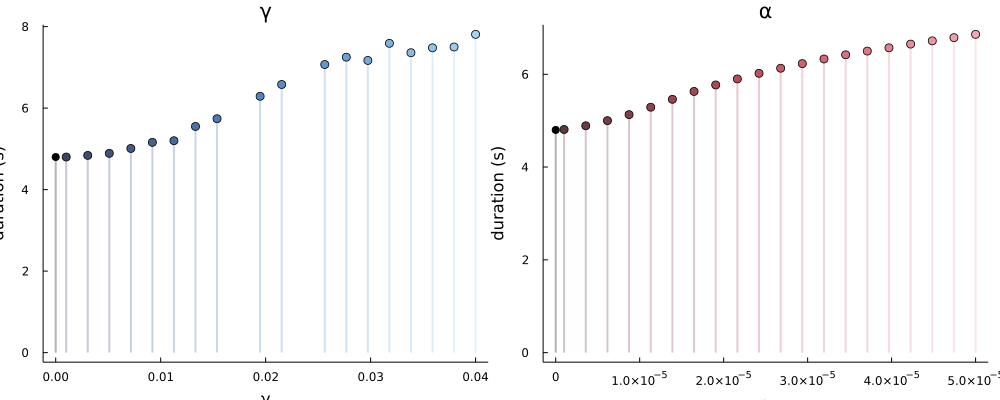

In [13]:
plots = []


for (var, sols) in zip((:γ, :α), (γ_solutions, α_solutions))
    plt = plot(; xlabel=var, ylabel="duration (s)")
    plot!(
        [0, 0],
        [0, globalsolution.t[end]],
        lw =2, color="black", alpha=.3, label=nothing
    )

    scatter!(
        [0],
        [globalsolution.t[end]],
        ms=5, color="black", label=nothing
    )
    
    colors = make_palette(var, sols)

    for (n, solution) in enumerate(sols)
        # plot!(solution.second.x, solution.second.y, lw=2, alpha=.8, color=colors[n], 
        #         label="$var: $(solution.first) - ($(round(solution.second.t[end]; digits=2))s)"
                
        #         ) 

        plot!(
            [solution.first, solution.first],
            [0, solution.second.t[end]],
            lw =2, color=colors[n], alpha=.3, label=nothing
        )

        scatter!(
            [solution.first],
            [solution.second.t[end]],
            ms=5, color=colors[n], label=nothing
        )
    end
    plot!(; title=var)
    push!(plots, plt)
end


fig = plot(plots...; grid=false, size=(1000, 400))
savefig(fig, joinpath(PLOTS_FOLDER, "global_mtm_cost_fn_duration.svg"))

fig


### plot speed traces

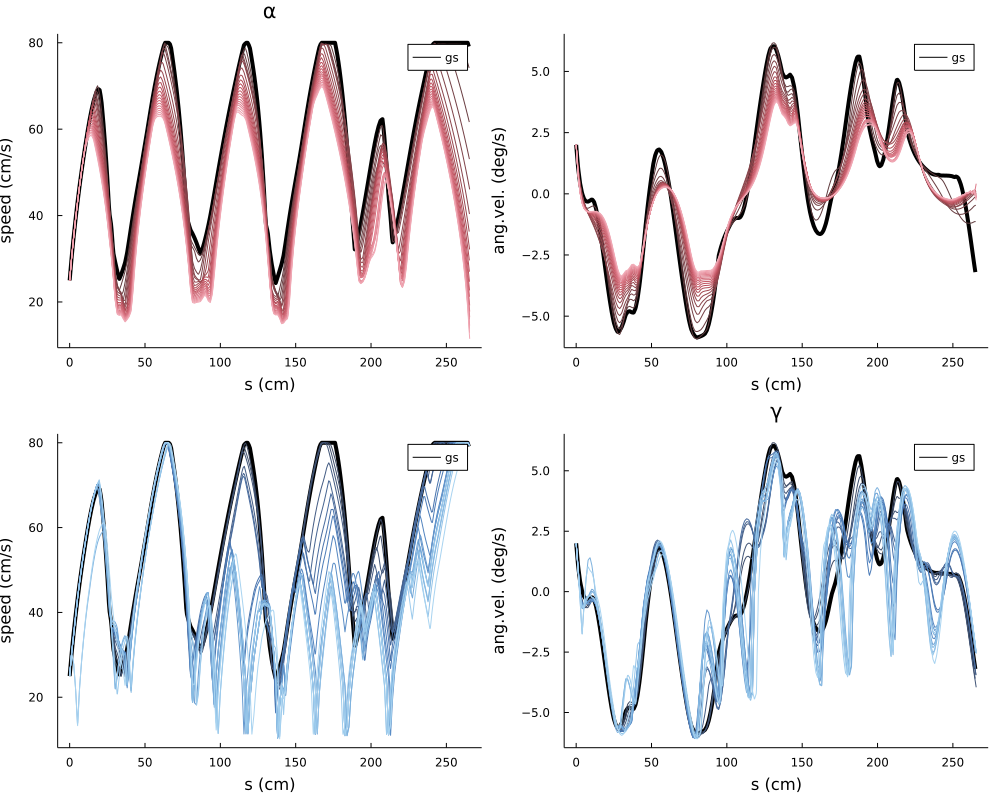

In [14]:
gs_u = get_solution_variable_at_s_values(globalsolution, 0, 258, 1, :u)
_s = 1:258

# plt = scatter(_s, gs_u, color="black", label="gs")
u_plot_α = plot(globalsolution.s, globalsolution.u, color="black", label="gs", lw=4; xlabel="s (cm)", ylabel="speed (cm/s)", title="α")
o_plot_α = plot(globalsolution.s, globalsolution.ω, color="black", label="gs", lw=4, xlabel="s (cm)", ylabel="ang.vel. (deg/s)")

u_plot_γ = plot(globalsolution.s, globalsolution.u, color="black", label="gs", lw=4; xlabel="s (cm)", ylabel="speed (cm/s)")
o_plot_γ = plot(globalsolution.s, globalsolution.ω, color="black", label="gs", lw=4, xlabel="s (cm)", ylabel="ang.vel. (deg/s)", title="γ")

for (var, sols) in zip((:γ, :α), (γ_solutions, α_solutions))
    colors = make_palette(var, sols)

    if var == :γ
        u_plot, o_plot = u_plot_γ, o_plot_γ
    else
        u_plot, o_plot = u_plot_α, o_plot_α
    end

    for (n, solution) in enumerate(sols)
        plot!(u_plot,
            solution.second.s, solution.second.u, color=colors[n], label=nothing
        )
        plot!(o_plot,
        solution.second.s, solution.second.ω, color=colors[n], label=nothing
    )
    end
    
end

fig = plot(u_plot_α, o_plot_α, u_plot_γ, o_plot_γ; size=(1000, 800), grid=false, link=:x)
savefig(fig, joinpath(PLOTS_FOLDER, "global_mtm_cost_fn_linKin.svg"))

fig

### plot distance from global solution

In [62]:
function Λ(x1, x2, y1, y2)
    dst = @. sqrt(((x1 - x2)^2 + (y1 - y2)^2))
    mean(dst), std(dst)
end


Λ (generic function with 1 method)

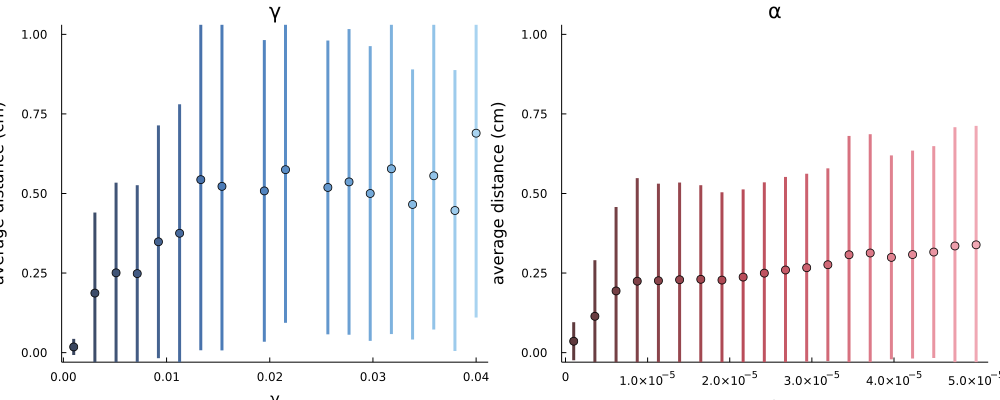

In [87]:
gs_x = get_solution_variable_at_s_values(globalsolution, 0, 258, 1, :x)
gs_y = get_solution_variable_at_s_values(globalsolution, 0, 258, 1, :y)

plots = []
for (var, sols) in zip((:γ, :α), (γ_solutions, α_solutions))

    colors = make_palette(var, sols)
    plt = plot(; xlabel=var, ylabel="average distance (cm)")
    for (n, solution) in enumerate(sols)
        sol_x = get_solution_variable_at_s_values(solution.second, 0, 258, 1, :x)
        sol_y = get_solution_variable_at_s_values(solution.second, 0, 258, 1, :y)

        dist, dst_std =  Λ(gs_x, sol_x, gs_y, sol_y)
        
        plot!(
            [solution.first, solution.first],
            [dist-dst_std, dist+dst_std],
            color=colors[n], label=nothing, lw=3,
        )


        scatter!(
            [solution.first],
            [dist],
            ms=5, color=colors[n], label=nothing
        )
    end
    plot!(; title=var,)
    push!(plots, plt)
end


fig = plot(plots...; grid=false, ylim=[0, 1.0], size=(1000, 400))
savefig(fig, joinpath(PLOTS_FOLDER, "global_mtm_cost_fn_mean_error.svg"))

fig

# Parameters

In [88]:
savepath = "/Users/federicoclaudi/Dropbox (UCL)/Rotation_vte/Locomotion/analysis/behavior/mtm_parameters"

p = -1:.1:1
@info "Number of values per parameter: $(length(p))"

@Info (Main):  Number of values per parameter: 21 
  ╰──────────────────────────────────────────────── 
                      Mon, 23 May 2022 17:03:05 


In [104]:
bike_default = Dict(
    :l_f=>3,
    :l_r=>2,
    :width=>2,
    # :m_f=>10, 
    # :m_r=>12, 
    :c=>4e3
)

bike_Δ = Dict(
    # :l_f=>bike_default[:l_f] * 0.5,
    # :l_r=>bike_default[:l_r] * 0.5,
    :width=>bike_default[:width] * 0.5,
    # :m_f=>bike_default[:m_f] * 0.5,
    # :m_r=>bike_default[:m_r] * 0.5,
    # :c=>bike_default[:c] * 0.53,
)

@info "Tot N simulations for bike: $(length(p) * length(bike_Δ))"

@Info (Main):  Tot N simulations for bike: 21 
  ╰──────────────────────────────────────────────── 
                      Mon, 23 May 2022 20:33:46 


### Run simulations

In [105]:
count = 1
for (parameter, pΔ) in pairs(bike_Δ)
    @info "Running simulations for: $(parameter)"
    for pval in p
        kwargs = (parameter => bike_default[parameter] + pΔ * pval, )
        bike = Bicycle(; kwargs...)

        _, _, control_model, solution = run_mtm(
            :dynamics,  # model type
            2.0;  # supports density
            showtrials=nothing,
            showplots=false,
            quiet=true,
            bike=bike
        )
        
        if "LOCALLY_SOLVED" == string(termination_status(control_model))
            destination = joinpath(savepath, "bike_param_$count.csv")
            data = DataFrame(toDict(solution))
            CSV.write(destination, data)
        else
            @warn "Failed" termination_status(control_model)
        end
        count += 1
    end
end

@Info (Main.top-level scope):  Running simulations for: width 
  ╰──────────────────────────────────────────────── 
                      Mon, 23 May 2022 20:33:50 
@Warn (Main.top-level scope):  Failed

 
  │ 
  │ (MathOptInterface.TerminationStatusCode)  ▶  termination_status(control_model) = LOCALLY_INFEASIBLE 
  ╰──────────────────────────────────────────────── 
                      Mon, 23 May 2022 20:49:08 


@Warn (Main.top-level scope):  Failed 
  │ 
  │ (MathOptInterface.TerminationStatusCode)  ▶  termination_status(control_model) = LOCALLY_INFEASIBLE 
  ╰──────────────────────────────────────────────── 
                      Mon, 23 May 2022 20:50:11 
@Warn (Main.top-level scope):  Failed

 
  │ 
  │ (MathOptInterface.TerminationStatusCode)  ▶  termination_status(control_model) = LOCALLY_INFEASIBLE 
  ╰──────────────────────────────────────────────── 
                      Mon, 23 May 2022 20:51:09 


@Warn (Main.top-level scope):  Failed 
  │ 
  │ (MathOptInterface.TerminationStatusCode)  ▶  termination_status(control_model) = LOCALLY_INFEASIBLE 
  ╰──────────────────────────────────────────────── 
                      Mon, 23 May 2022 20:52:09 


### Params metadata

In [106]:
import OrderedCollections: OrderedDict
params_metadata = Dict{Int64, Pair}()

count = 1
for (parameter, pΔ) in pairs(bike_Δ)
    for pval in p
        params_metadata[count] =  parameter => bike_default[parameter] + pΔ * pval

        count += 1
    end
end

"""
For each parameter get the ID of all the simulations that 
varied that parameter values
"""
function get_param_runs_ids(param::Symbol)
    res = OrderedDict{Int64, Number}()

    for (id, (sim_param, value)) in pairs(params_metadata)
       if sim_param == param
        res[id] = value
       end
    end

   return sort!(res)
end


get_param_runs_ids

### Analysis

In [107]:
solutions, _names = load_mtm_solutions(; folder=savepath, name="")
@info "Loaded $(length(solutions)) solutions"
solutions_ids = map(n -> parse(Int64, split(split(n, "_")[3], ".")[1]), _names);

solutions = Dict(_id=>sol for (_id, sol) in zip(solutions_ids, solutions))

@Info (Main):  Loaded 80 solutions 
  ╰──────────────────────────────────────────────── 
                      Mon, 23 May 2022 20:56:12 


Dict{Int64, Solution} with 80 entries:
  5  => Solution(0.01, [-7.96423e-41, 0.010383, 0.0202941, 0.0302052, 0.0401163…
  56 => Solution(0.01, [1.72411e-46, 0.0103502, 0.0202299, 0.0301096, 0.0404598…
  16 => Solution(0.01, [-1.69054e-40, 0.0104279, 0.0203818, 0.0303358, 0.040289…
  20 => Solution(0.01, [8.54456e-41, 0.0104747, 0.0202511, 0.0300276, 0.0405023…
  35 => Solution(0.01, [-1.81056e-41, 0.0103162, 0.0201635, 0.0300108, 0.040327…
  55 => Solution(0.01, [8.3816e-45, 0.0103275, 0.0201857, 0.0300438, 0.0403713,…
  79 => Solution(0.01, [5.09893e-41, 0.010431, 0.0203879, 0.0303448, 0.0403016,…
  60 => Solution(0.01, [1.64719e-40, 0.0103578, 0.0202448, 0.0301319, 0.0400189…
  81 => Solution(0.01, [-2.60766e-41, 0.0101451, 0.0202902, 0.0304353, 0.040139…
  30 => Solution(0.01, [-2.85162e-43, 0.0103639, 0.0202568, 0.0301497, 0.040042…
  19 => Solution(0.01, [5.84977e-39, 0.0104279, 0.0203818, 0.0303358, 0.0402897…
  32 => Solution(0.01, [-5.88907e-39, 0.0103235, 0.0201777, 0.030032, 

In [96]:
diverging_palette(250, 1, s=.5, b=1,  )

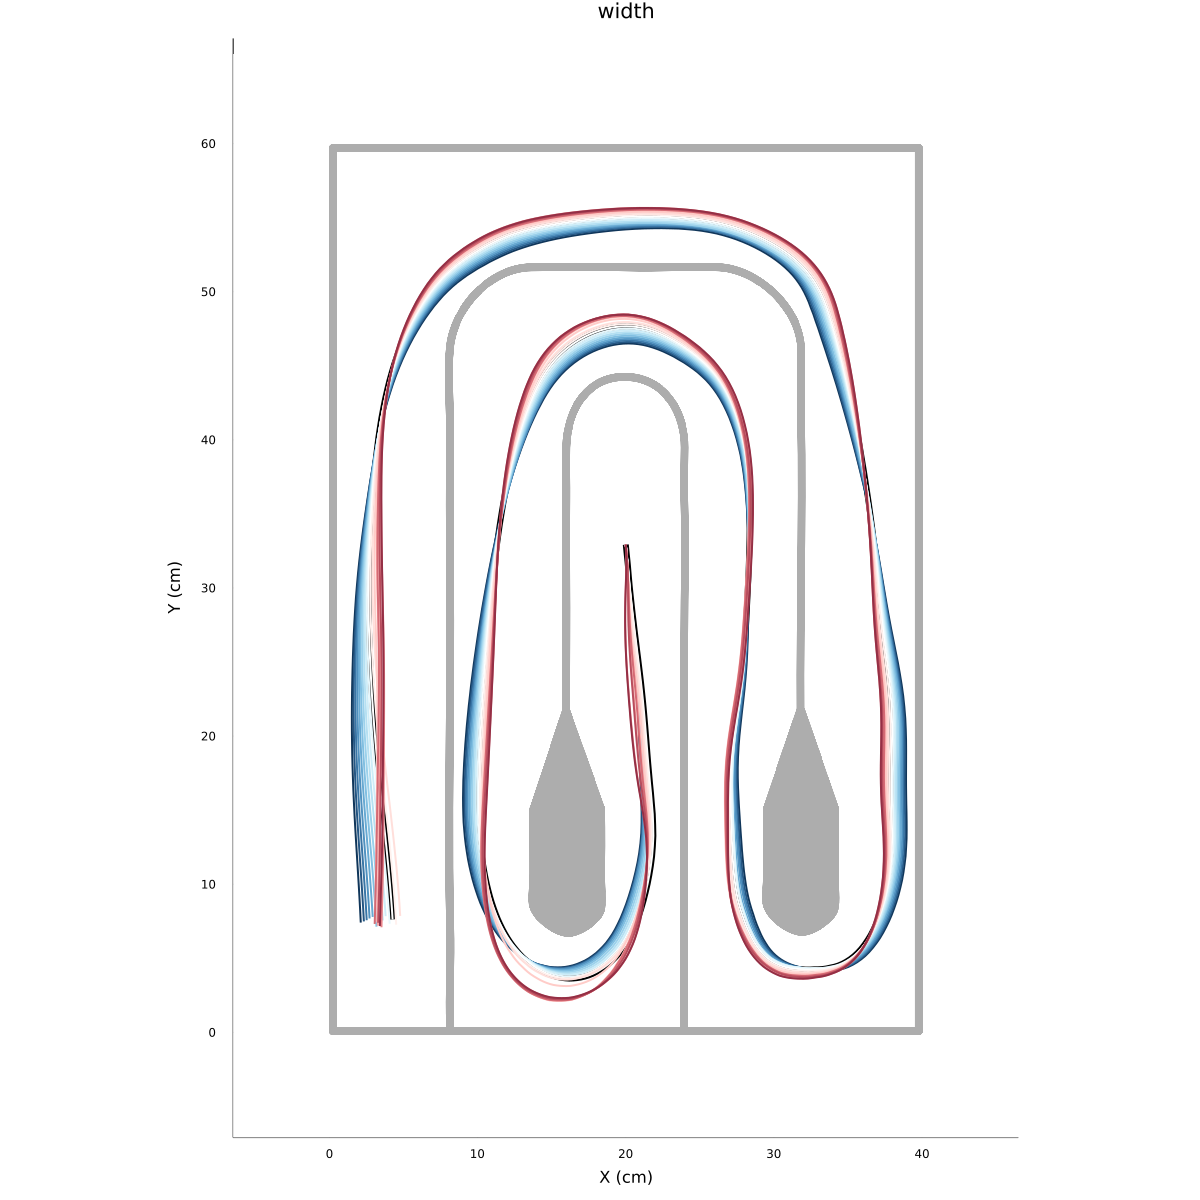

In [108]:
plots = []
colors = diverging_palette(250, 1, length(p); s=.5, b=1.0, w=.25)

for para in keys(bike_Δ)
    runs_ids = get_param_runs_ids(para)

    param_solutions = [(get(solutions, _id, nothing), val) for (_id, val) in runs_ids]

    plt = draw(:arena)
    plot!(
        globalsolution.x, globalsolution.y, 
        lw=6, color="black",
        label="global"
    )

    for (n, (sol, val)) in enumerate(param_solutions)
        isnothing(sol) && continue
        plot!(sol.x, sol.y, 
            lw=2, color=colors[n],
            label="$(para): $(round(val; digits=2)) - ($(round(sol.t[end]; digits=2)), s)")
    end



    plot!(title=para)
    push!(plots, plt)

end

fig = plot(plots...; grid=false, legend=false)
savefig(fig, joinpath(PLOTS_FOLDER, "global_mtm_params_XY.svg"))

fig


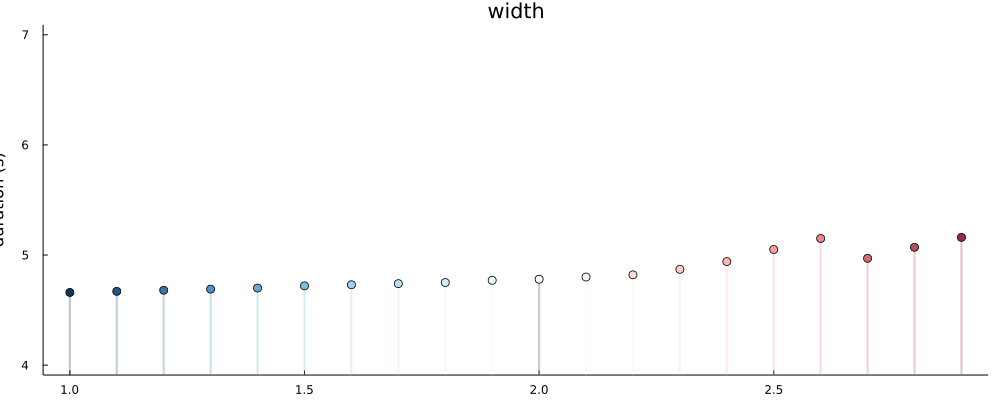

In [109]:
plots = []

for para in keys(bike_Δ)
    runs_ids = get_param_runs_ids(para)

    param_solutions = [(get(solutions, _id, nothing), val) for (_id, val) in runs_ids]

    
    plt = plot(; para=var, ylabel="duration (s)", ylim=[4, 7])

    default_val = bike_default[para]
    plot!(
        [default_val, default_val],
        [0, globalsolution.t[end]],
        lw =2, color="black", alpha=.3, label=nothing
    )

    scatter!(
        [default_val],
        [globalsolution.t[end]],
        ms=5, color="black", label=nothing
    )
    

    for (n, (sol, val)) in enumerate(param_solutions)
        isnothing(sol) && continue
        plot!(
            [val, val],
            [0, sol.t[end]],
            lw =2, color=colors[n], alpha=.3, label=nothing
        )

        scatter!(
            [val],
            [sol.t[end]],
            ms=5, color=colors[n], label=nothing
        )
    end
    plot!(; title=para)
    push!(plots, plt)
end


fig = plot(plots...; grid=false, size=(1000, 400))
savefig(fig, joinpath(PLOTS_FOLDER, "global_mtm_params_duration.svg"))

fig


### plot duration vs error

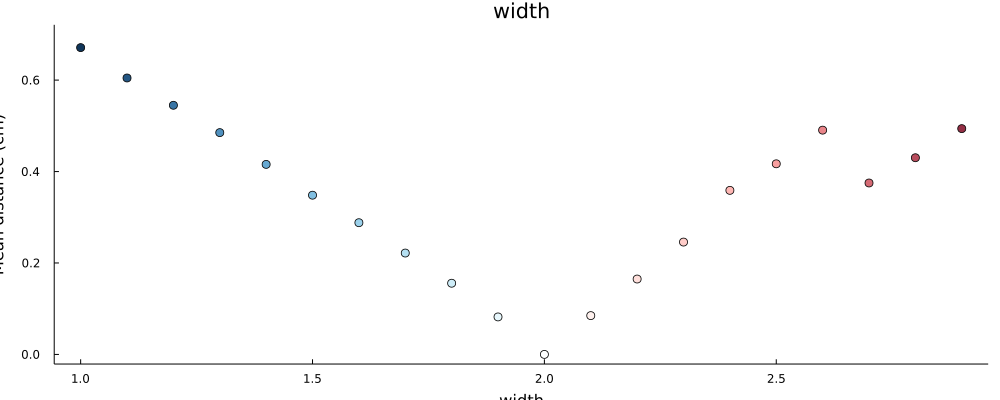

In [110]:
gs_x = get_solution_variable_at_s_values(globalsolution, 0, 258, 1, :x)
gs_y = get_solution_variable_at_s_values(globalsolution, 0, 258, 1, :y)


plots = []
for para in keys(bike_Δ)
    runs_ids = get_param_runs_ids(para)

    param_solutions = [(get(solutions, _id, nothing), val) for (_id, val) in runs_ids]
    plt = plot()


    for (n, (sol, val)) in enumerate(param_solutions)
        isnothing(sol) && continue
        sol_x = get_solution_variable_at_s_values(sol, 0, 258, 1, :x)
        sol_y = get_solution_variable_at_s_values(sol, 0, 258, 1, :y)

        dist =  mean(@. sqrt(((gs_x - sol_x)^2 + (gs_y - sol_y)^2)))
        
        scatter!(
            [val],
            [dist],
            ms=5, color=colors[n], label=nothing
        )
    end
    plot!(; title=para, ylim=[0, .7], ylabel="Mean distance (cm)", xlabel=para)
    push!(plots, plt)
end


fig = plot(plots...; grid=false, size=(1000, 400))
savefig(fig, joinpath(PLOTS_FOLDER, "global_mtm_params_mean_error.svg"))

fig